In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [ ]:
df=pd.read_csv("placement.csv")

In [ ]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [ ]:
X = df[['cgpa']]
y = df['package']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
x_train,y_train

(     cgpa
 137  7.14
 163  8.93
 111  5.42
 123  5.10
 109  7.77
 ..    ...
 43   7.66
 22   6.14
 72   7.78
 15   7.25
 168  8.65
 
 [160 rows x 1 columns],
 137    3.13
 163    3.91
 111    2.25
 123    2.30
 109    4.06
        ... 
 43     2.76
 22     2.30
 72     3.62
 15     3.23
 168    3.52
 Name: package, Length: 160, dtype: float64)

In [ ]:
x_train_const=sm.add_constant(x_train)

In [ ]:
x_test_const=sm.add_constant(x_test)

In [ ]:
model = sm.OLS(y_train,x_train_const).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                package   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     539.0
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           8.63e-53
Time:                        10:02:25   Log-Likelihood:                -45.540
No. Observations:                 160   AIC:                             95.08
Df Residuals:                     158   BIC:                             101.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8961      0.170     -5.274      0.0

In [ ]:
def pred(x):
  return 0.55 *x -0.89

In [ ]:
pred(78)

42.010000000000005

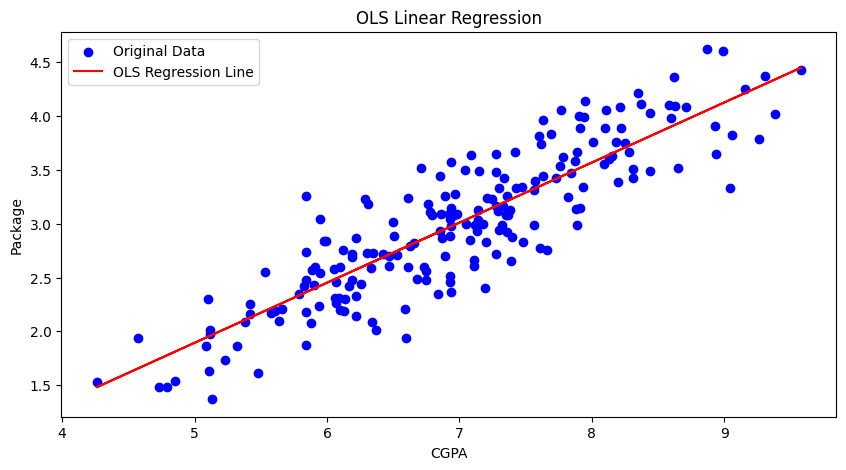

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Original Data")
X_const_plot = sm.add_constant(X)
y_pred_ols = model.predict(X_const_plot)
plt.plot(X, model.predict(sm.add_constant(X)), color="red", label="OLS Regression Line")
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.title("OLS Linear Regression")
plt.legend()
plt.show()

In [ ]:
df2=pd.read_csv("50_Startups.csv")

In [ ]:
df2

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X=df2[['Administration','Marketing Spend','R&D Spend','State']]

In [ ]:
Y=df2["Profit"]

In [ ]:
X

,Administration,Marketing Spend,R&D Spend,State
0,136897.80,471784.10,165349.20,New York
1,151377.59,443898.53,162597.70,California
2,101145.55,407934.54,153441.51,Florida
3,118671.85,383199.62,144372.41,New York
4,91391.77,366168.42,142107.34,Florida
5,99814.71,362861.36,131876.90,New York
6,147198.87,127716.82,134615.46,California
7,145530.06,323876.68,130298.13,Florida
8,148718.95,311613.29,120542.52,New York
9,108679.17,304981.62,123334.88,California


In [ ]:
Y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(40, 4)

In [ ]:

X_train_processed = pd.get_dummies(X_train, columns=['State'], drop_first=True).astype(int)
X_train_const = sm.add_constant(X_train_processed)
model=sm.OLS(y_train,X_train_const).fit()

In [ ]:
X_train_processed

,Administration,Marketing Spend,R&D Spend,State_Florida,State_New York
12,127320,249839,93863,1,0
4,91391,366168,142107,1,0
37,51283,197029,44069,0,0
8,148718,311613,120542,0,1
3,118671,383199,144372,0,1
6,147198,127716,134615,0,0
41,84710,164470,27892,1,0
46,115816,297114,1315,1,0
47,135426,0,0,0,0
15,122616,261776,114523,0,1


In [ ]:
model=sm.OLS(y_train,X_train_const).fit()


In [ ]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     140.1
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           1.13e-21
Time:                        10:18:40   Log-Likelihood:                -420.63
No. Observations:                  40   AIC:                             853.3
Df Residuals:                      34   BIC:                             863.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.403e+04   8457.321      6.388      0.000    3.68e+04    7.12e+04
Administration     -0.0688      0.061     -1.133      0.265      -0.192       0.055
Marketing Spend     0.0299      0.022      1.346      0.187      -0.015       0.075
R&D Spend           0.8056      0.052     15.383      0.000       0.699       0.912
State_Florida     938.7497   3893.531      0.241      0.811   -6973.857    8851.357
State_New York      6.9092   3882.786      0.002      0.999   -7883.861    7897.679
==============================================================================
Omnibus:                       15.392   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.233
Skew:                          -1.142   Prob(JB):                     4.04e-05
Kurtosis:                       5.631   Cond. No.                     1.64e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
def predict_profit(admin, marketing, rd, state):


    state_florida = 1 if state == "Florida" else 0
    state_newyork = 1 if state == "New York" else 0

    profit = (
        54030
        - 0.0688 * admin
        + 0.0299 * marketing
        + 0.8056 * rd
        + 938.75 * state_florida
        + 6.91 * state_newyork
    )

    return profit


In [ ]:
predict_profit(
    admin=120000,
    marketing=300000,
    rd=150000,
    state="Florida"
)

176522.75

In [ ]:
df2 = pd.read_csv("Student_Performance.csv")
df2

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
X=df2[['Hours Studied','Previous Scores','Extracurricular Activities','Sleep Hours']]
Y=df2["Performance Index"]

In [ ]:
Y

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0
...,...
9995,23.0
9996,58.0
9997,74.0
9998,95.0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=2)
x_train.shape
X_train_processed = pd.get_dummies(x_train, columns=['Extracurricular Activities'], drop_first=True).astype(int)
x_train_const=sm.add_constant(X_train_processed)
model = sm.OLS(y_train,x_train_const).fit()

In [ ]:
X_train_processed

,Hours Studied,Previous Scores,Sleep Hours,Extracurricular Activities_Yes
8856,9,82,7,1
1545,7,76,8,0
8136,9,47,5,0
7768,3,60,9,1
7782,9,88,9,0
...,...,...,...,...
1099,5,87,5,1
2514,6,56,4,0
6637,2,98,8,0
2575,8,45,8,0


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.616e+05
Date:                Thu, 05 Feb 2026   Prob (F-statistic):               0.00
Time:                        07:18:25   Log-Likelihood:                -17364.
No. Observations:                8000   AIC:                         3.474e+04
Df Residuals:                    7995   BIC:                         3.477e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -33.3322      0.144   -231.730      0.000     -33.614     -33.050
Hours Studied                      2.8572      0.009    310.707      0.000       2.839       2.875
Previous Scores                    1.0198      0.001    745.768      0.000       1.017       1.022
Sleep Hours                        0.4867      0.014     34.663      0.000       0.459       0.514
Extracurricular Activities_Yes     0.6087      0.047     12.830      0.000       0.516       0.702
==============================================================================
Omnibus:                        1.632   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                1.626
Skew:                           0.008   Prob(JB):                        0.444
Kurtosis:                       3.068   Cond. No.                         438.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
def predict(hours_studied, previous_scores, sleep_hours, extracurricular_activities_yes):
  performance_index=(
  -30.1638
  + 2.8577 * hours_studied
  + 1.0202 * previous_scores
  +0.4867 * sleep_hours
  +0.5672 * extracurricular_activities_yes
  )
  return performance_index

In [ ]:
predict(
    hours_studied=45,
    previous_scores=70,
    sleep_hours=8,
    extracurricular_activities_yes=1
)

174.3075

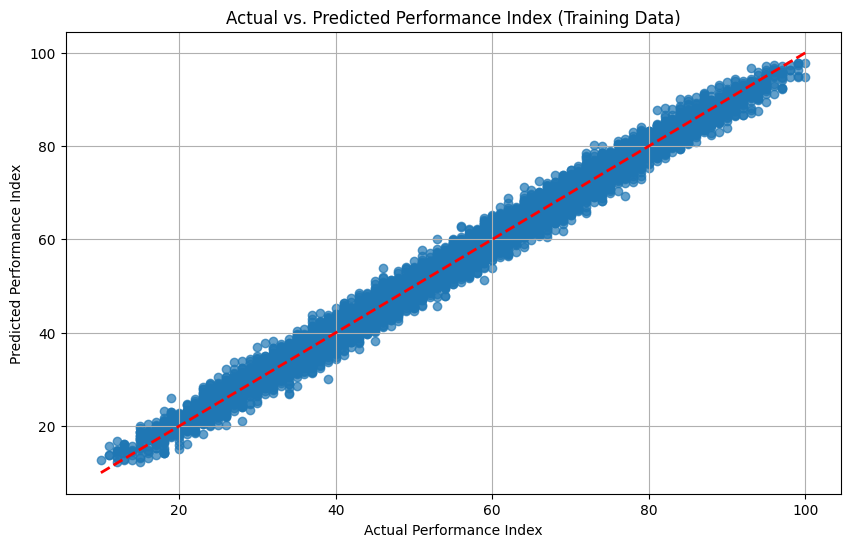

In [ ]:
y_pred_train = model.predict(x_train_const)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs. Predicted Performance Index (Training Data)")
plt.grid(True)
plt.show()